**1.** Normal approximation: suppose that $y_1, . . . , y_5$ are independent samples from a Cauchy
distribution with unknown center $θ$ and known scale $1$: $p\left ( y_i\mid \theta  \right )\propto 1/\left (1 + \left ( y_i - \theta \right )^2 \right )$.
Assume that the prior distribution for $θ$ is uniform on $[0, 1]$. Given the observations
$(y_1, . . . , y_5) = (−2,−1, 0, 1.5, 2.5)$:

**(a)** Determine the derivative and the second derivative of the log posterior density.

In [1]:
from sympy.stats import density, Cauchy
from sympy import Symbol, log, diff, simplify
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats as st

In [2]:
y = Symbol('y')
θ = Symbol('θ')
n = Symbol('n')

In [3]:
Y = Cauchy('Y', y, 1)
pdf = density(Y)(θ)

# Log posterior density
logpdf = log(pdf)
logpdf.simplify()

log(1/(pi*((-y + θ)**2 + 1)))

In [4]:
# First derivative
diff(logpdf, θ).simplify()

2*(y - θ)/((y - θ)**2 + 1)

In [5]:
# Second derivative
diff(logpdf, θ, 2).simplify()

2*((y - θ)**2 - 1)/((y - θ)**2 + 1)**2

In [6]:
def logCauchy(x, theta):
    return np.sum(np.log(1 / (np.pi * (((-x + theta)**2) + 1))))
def minuslogCauchy(x, theta):
    return -np.sum(np.log(1 / (np.pi * (((-x + theta)**2) + 1))))
def dlogCauchy(x, theta):
    return np.sum((2 * (x - theta)) / (((x - theta)**2) + 1)**2)
def d2logCauchy(x, theta):
    return np.sum((2 * (1 - (x - theta)**2)) / (((x - theta)**2) + 1)**2)

In [7]:
x = np.array([-2,-1,0,1.5,2.5])
thetas = np.linspace(-4, 4, 100)
d = [logCauchy(x, theta) for theta in thetas]

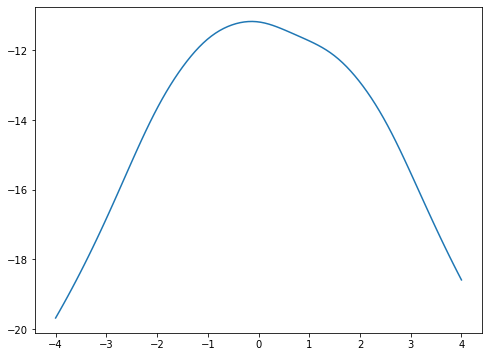

In [8]:
plt.figure(figsize = (8,6))
plt.plot(thetas, d);

**(b)** Find the posterior mode of $θ$ by iteratively solving the equation determined by setting
the derivative of the log-likelihood to zero.

In [9]:
theta_start = np.mean(x)
mle = scipy.optimize.minimize(minuslogCauchy, theta_start, args=(x))
mle

      fun: 11.172922656283603
 hess_inv: array([[0.72721827]])
      jac: array([1.1920929e-07])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([-0.13764923])

**(c)** Construct the normal approximation based on the second derivative of the log posterior
density at the mode. Plot the approximate normal density and compare to the exact
density computed in Exercise 2.11.

In [10]:
# S = 1 / mle.hess_inv
S = d2logCauchy(x, mle.x)
S

1.3748900049546402

In [12]:
D = np.exp(d)
D = D / np.diff(thetas[:2] * np.sum(D))
D;

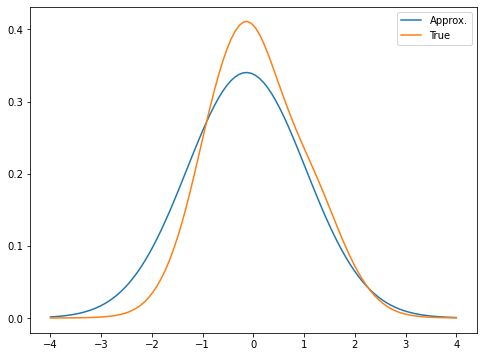

In [13]:
plt.figure(figsize = (8,6))
plt.plot(thetas, st.norm.pdf(thetas, mle.x, np.sqrt(S)), label = 'Approx.')
plt.plot(thetas, D, label = 'True')
plt.legend();